In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

import cv2

In [ ]:
BASEPATH = "/content/drive/MyDrive/archive/Original Dataset"

LABELS = set()

paths = []

for d in os.listdir(BASEPATH):
    LABELS.add(d)
    paths.append((BASEPATH+d, d))

BASEPATH = "/content/drive/MyDrive/archive/Original Dataset"
for d in os.listdir(BASEPATH):
    LABELS.add(d)
    paths.append((BASEPATH+d, d))

In [ ]:
# resizing and converting to RGB
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
import os
import cv2

BASEPATH = "/content/drive/MyDrive/archive/Original Dataset"

LABELS = set()

paths = []

for d in os.listdir(BASEPATH):
    LABELS.add(d)
    # Use os.path.join to create correct paths
    paths.append((os.path.join(BASEPATH, d), d))

X = []
y = []

for path, label in paths:
    for image_path in os.listdir(path):
        # Use os.path.join to correctly concatenate paths
        image = load_and_preprocess_image(os.path.join(path, image_path))

        X.append(image)
        y.append(label)

In [ ]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))

print(y[0])

[0 0 1 0]


(656, 224, 224, 3)
(656, 4)


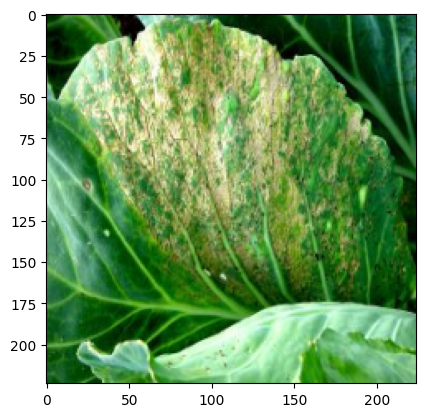

In [ ]:
print(X.shape)
print(y.shape)
plt.imshow(X[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(len(LABELS),activation="softmax"))

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
preds=Dense(len(LABELS),activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True

model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,816,452 (64.15 MB)

 Trainable params: 2,101,764 (8.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
# early_stopping = EarlyStopping(patience=5, verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test), callbacks=[reduce_lr])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 436s 43s/step - accuracy: 0.4011 - loss: 6.3997 - val_accuracy: 0.5455 - val_loss: 1.0007 - learning_rate: 0.0010
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 433s 43s/step - accuracy: 0.7843 - loss: 0.6251 - val_accuracy: 0.9091 - val_loss: 0.2398 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 427s 43s/step - accuracy: 0.8927 - loss: 0.2873 - val_accuracy: 0.9242 - val_loss: 0.2151 - learning_rate: 0.0010
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 426s 43s/step - accuracy: 0.9652 - loss: 0.0912 - val_accuracy: 1.0000 - val_loss: 0.0582 - learning_rate: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 454s 44s/step - accuracy: 0.9838 - loss: 0.0903 - val_accuracy: 0.9697 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 430s 43s/step - accuracy: 0.9921 - loss: 0.0239 - val_accuracy: 0.9848 - val_loss: 0.0376 - learning_rate: 0.0010
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 439s 43s/step - accuracy: 0.9968 - loss: 0.0118 - 

In [ ]:
history.history

{'accuracy': [0.5169491767883301,
  0.808474600315094,
  0.8881356120109558,
  0.9728813767433167,
  0.9847457408905029,
  0.994915246963501,
  0.994915246963501,
  0.994915246963501,
  1.0,
  1.0],
 'loss': [5.012545585632324,
  0.5500723123550415,
  0.28832146525382996,
  0.08836614340543747,
  0.07170501351356506,
  0.018592853099107742,
  0.013967535458505154,
  0.012402983382344246,
  0.0033835433423519135,
  0.004842435475438833],
 'val_accuracy': [0.5454545617103577,
  0.9090909361839294,
  0.9242424368858337,
  1.0,
  0.9696969985961914,
  0.9848484992980957,
  0.9545454382896423,
  0.9696969985961914,
  0.9848484992980957,
  0.9848484992980957],
 'val_loss': [1.000732660293579,
  0.23981796205043793,
  0.215053990483284,
  0.058211006224155426,
  0.06169770658016205,
  0.037587448954582214,
  0.09856719523668289,
  0.04707407206296921,
  0.03913754224777222,
  0.03727273643016815],
 'learning_rate': [0.0010000000474974513,
  0.0010000000474974513,
  0.0010000000474974513,
  0.

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print(f"loss on the test set is {loss:.2f}")
print(f"accuracy on the test set is {acc:.3f}")

loss on the test set is 0.04
accuracy on the test set is 0.985


3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step


<Axes: >

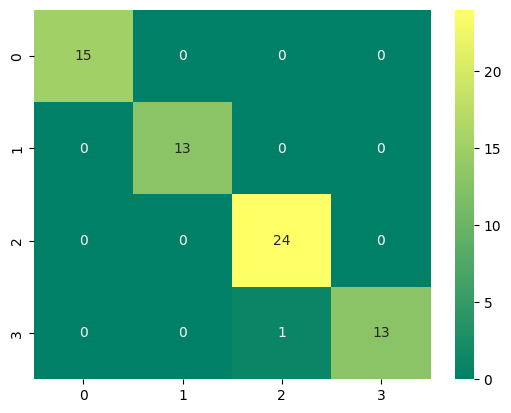

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_predi=np.argmax(y_pred, axis=1)
y_testi=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testi , y_predi)

import seaborn as sns
sns.heatmap(cm , cmap="summer" , annot=True)

In [ ]:
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 12s/step


In [ ]:
label_predictions = encoder.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step


<Axes: >

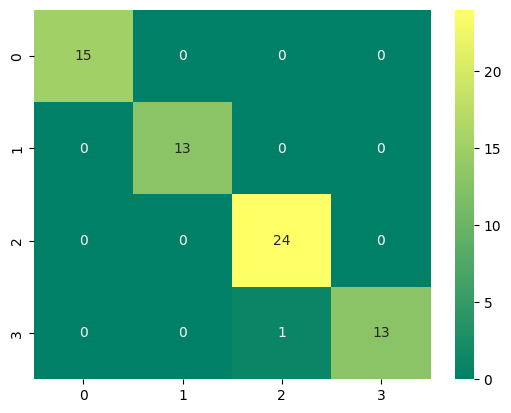

In [ ]:
y_pred = model.predict(X_test)
y_predi=np.argmax(y_pred, axis=1)
y_testi=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testi , y_predi)

import seaborn as sns
sns.heatmap(cm , cmap="summer" , annot=True)

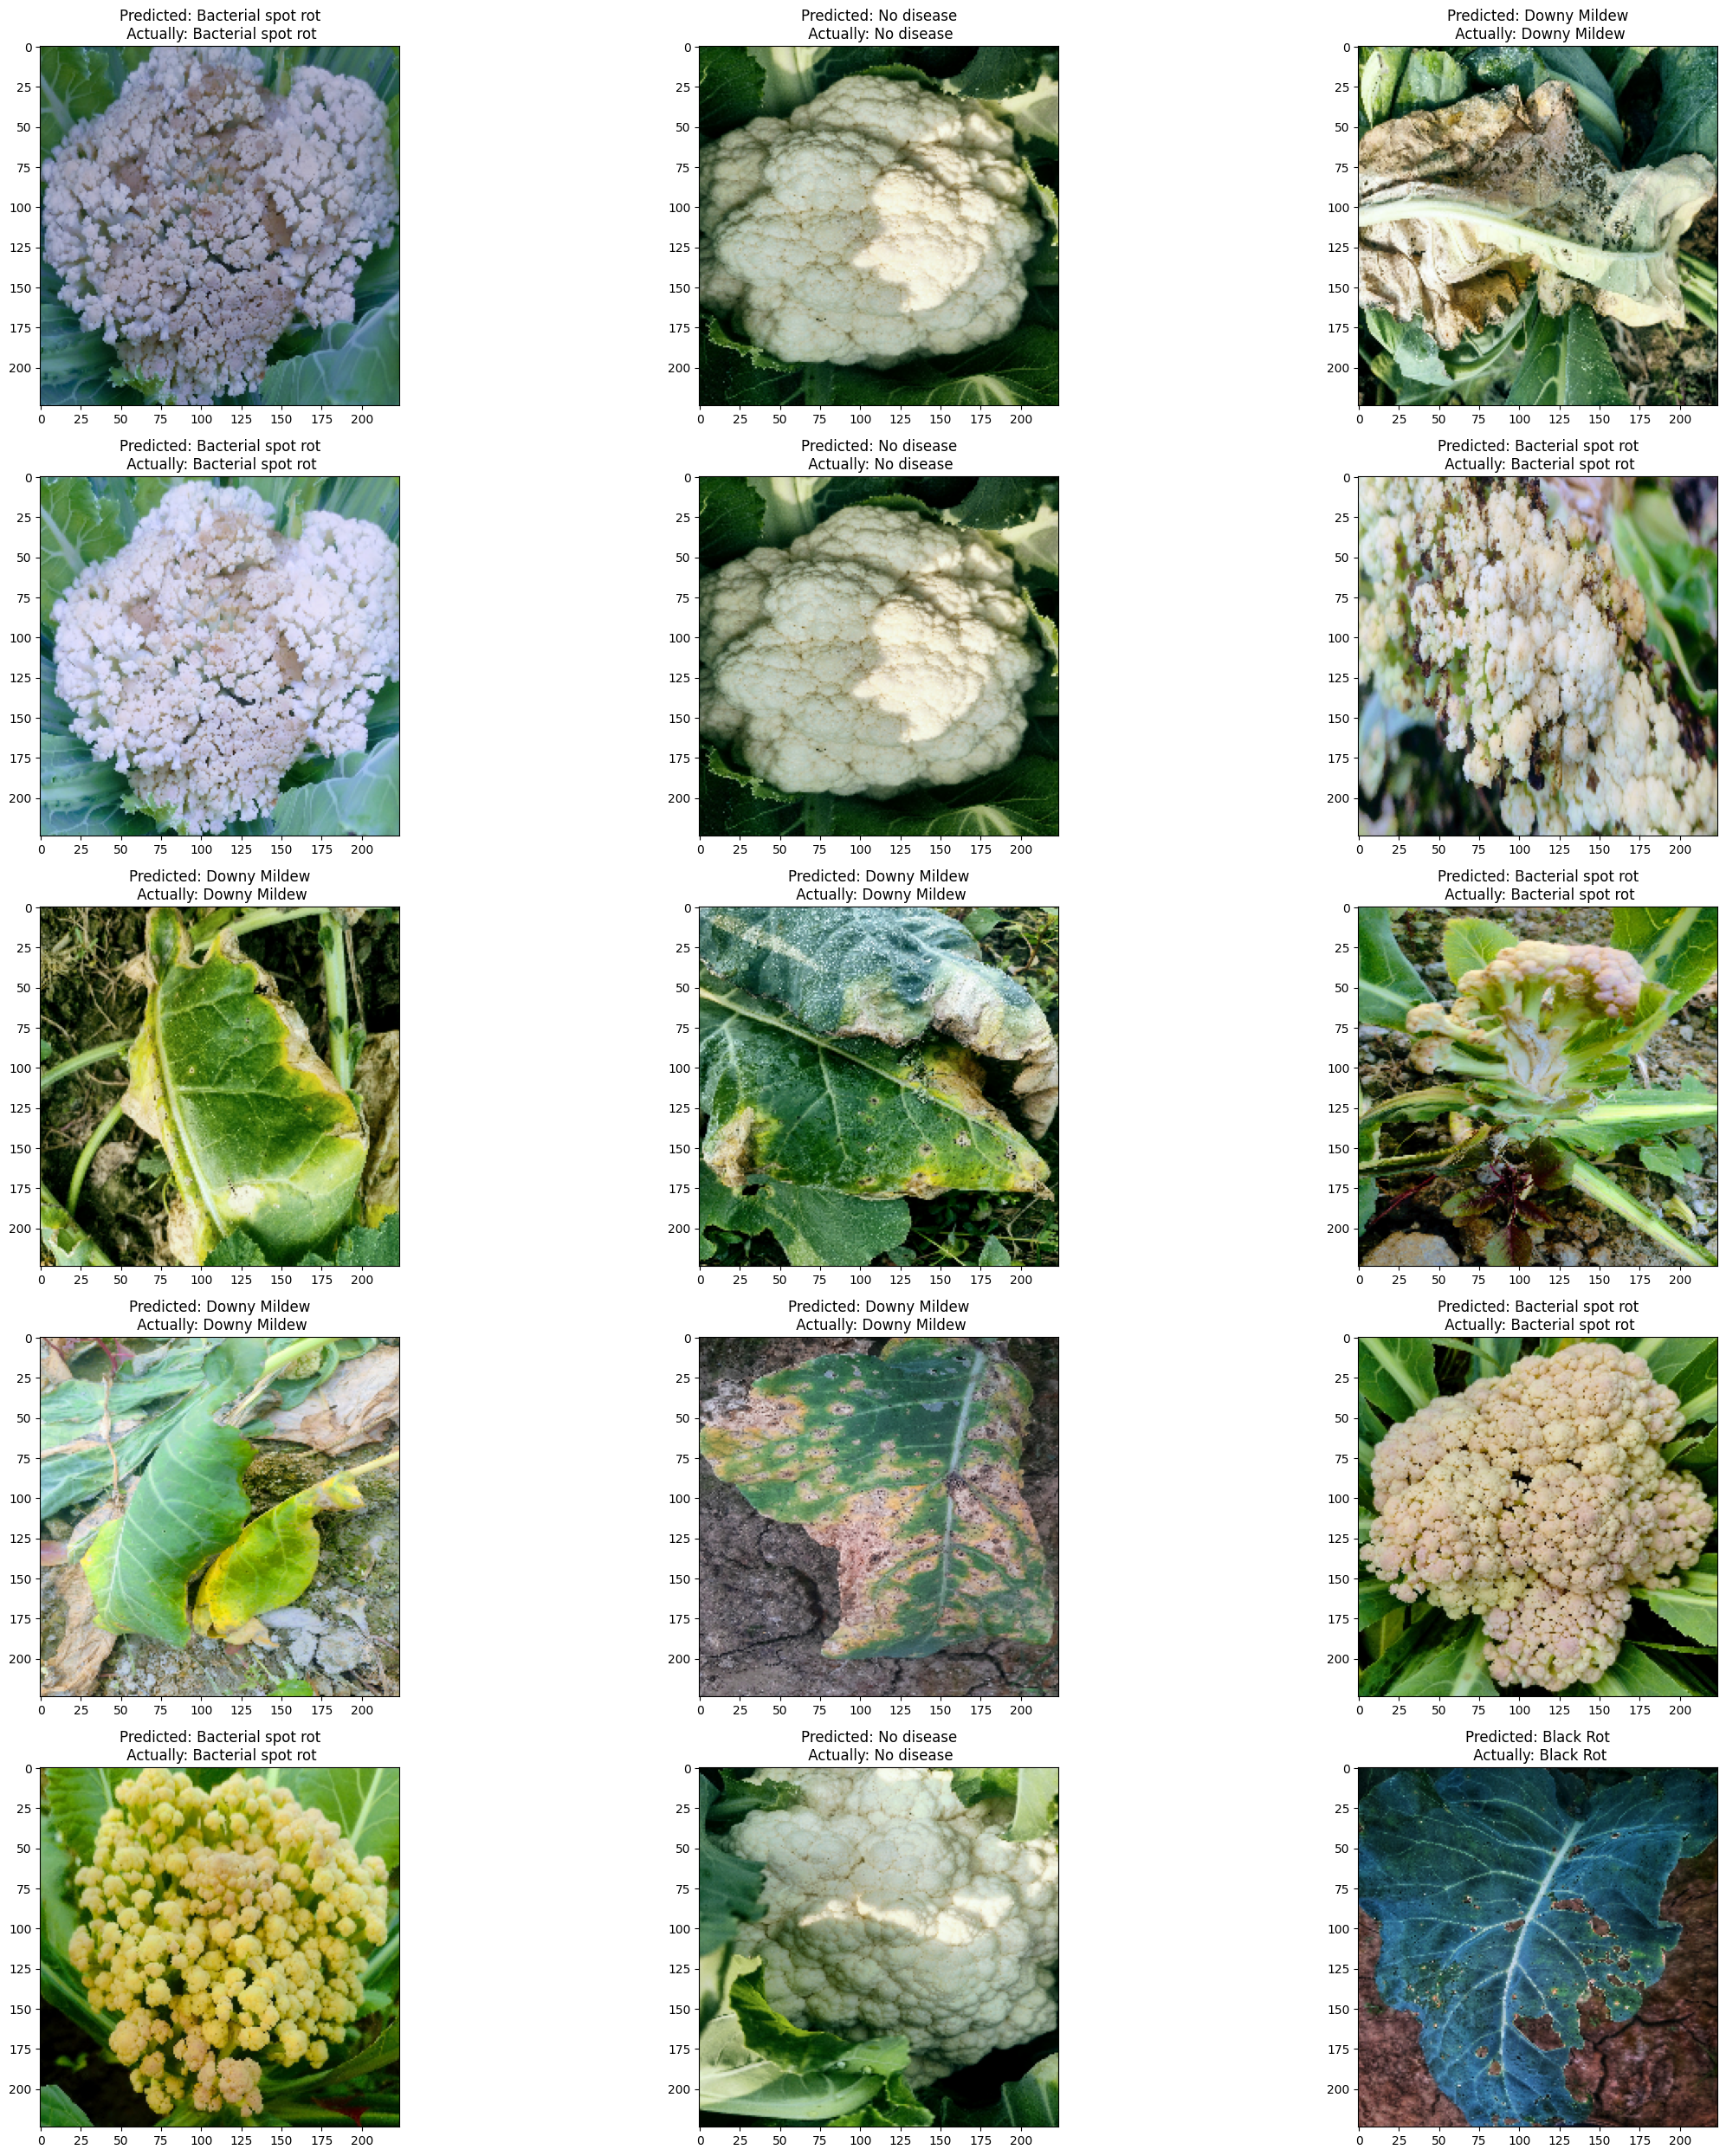

In [ ]:
rows, cols = 5, 3
size = 25

fig,ax=plt.subplots(rows,cols)
fig.set_size_inches(size,size)
for i in range(rows):
    for j in range (cols):
        index = np.random.randint(0,len(X_test))
        ax[i,j].imshow(X_test[index])
        ax[i,j].set_title(f'Predicted: {label_predictions[index]}\n Actually: {encoder.inverse_transform(y_test)[index]}')

plt.tight_layout()